### 初步了解数据集

In [1]:
import os
# 进入data/12_RGB_FullyLabeled_640
os.chdir('../data/12_RGB_FullyLabeled_640/coco')

In [2]:
os.listdir()

['class12_RGB_all_L.xlsx', 'classes.txt', 'train', 'val']

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [11]:
#读取train的图片数量
train_path = './train/images'
print(len(os.listdir(train_path)))

#读取val的图片数量  
val_path = './val/images'
print(len(os.listdir(val_path)))

print("训练比例：")
print(len(os.listdir(train_path))/(len(os.listdir(train_path))+len(os.listdir(val_path))))

print("验证比例：")
print(len(os.listdir(val_path))/(len(os.listdir(train_path))+len(os.listdir(val_path))))



1067
304
训练比例：
0.7782640408460978
验证比例：
0.22173595915390226


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_yolo_labels(label_dir):
    """
    统计YOLO格式标签的分布情况
    Args:
        label_dir (str): 存放YOLO标签文件的目录路径
    Returns:
        dict: 包含类别分布、边界框尺寸等统计信息的字典
    """
    # 初始化统计容器
    class_counts = defaultdict(int)
    box_widths = []
    box_heights = []
    box_areas = []
    box_aspect_ratios = []
    
    # 遍历标签目录中的所有文件
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
            
        filepath = os.path.join(label_dir, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
            
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
                
            class_id = int(parts[0])
            x_center, y_center = float(parts[1]), float(parts[2])
            width, height = float(parts[3]), float(parts[4])
            
            # 统计类别
            class_counts[class_id] += 1
            
            # 统计边界框尺寸
            box_widths.append(width)
            box_heights.append(height)
            box_areas.append(width * height)
            box_aspect_ratios.append(width / height if height != 0 else 0)
    
    # 转换为numpy数组方便计算统计量
    box_widths = np.array(box_widths)
    box_heights = np.array(box_heights)
    box_areas = np.array(box_areas)
    box_aspect_ratios = np.array(box_aspect_ratios)
    
    # 计算统计指标
    stats = {
        'class_distribution': dict(sorted(class_counts.items())),
        'num_boxes': len(box_widths),
        'box_widths': box_widths,  # 保存原始宽度数据
        'box_heights': box_heights,  # 保存原始高度数据
        'box_areas': box_areas,  # 保存原始面积数据
        'box_aspect_ratios': box_aspect_ratios,  # 保存原始宽高比数据
        'box_stats': {
            'width': {
                'mean': np.mean(box_widths),
                'std': np.std(box_widths),
                'min': np.min(box_widths),
                'max': np.max(box_widths)
            },
            'height': {
                'mean': np.mean(box_heights),
                'std': np.std(box_heights),
                'min': np.min(box_heights),
                'max': np.max(box_heights)
            },
            'area': {
                'mean': np.mean(box_areas),
                'std': np.std(box_areas),
                'min': np.min(box_areas),
                'max': np.max(box_areas)
            },
            'aspect_ratio': {
                'mean': np.mean(box_aspect_ratios),
                'std': np.std(box_aspect_ratios),
                'min': np.min(box_aspect_ratios),
                'max': np.max(box_aspect_ratios)
            }
        }
    }
    
    return stats

def plot_label_stats(stats):
    """
    可视化标签统计结果
    Args:
        stats (dict): analyze_yolo_labels返回的统计字典
    """
    # 类别分布柱状图
    plt.figure(figsize=(15, 10))
    
    # 子图1：类别分布
    plt.subplot(2, 2, 1)
    classes = list(stats['class_distribution'].keys())
    counts = list(stats['class_distribution'].values())
    plt.bar(classes, counts)
    plt.title('Class Distribution')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Boxes')
    
    # 子图2：边界框宽高分布
    plt.subplot(2, 2, 2)
    plt.scatter(stats['box_widths'], stats['box_heights'], alpha=0.3)
    plt.title('Box Size Distribution')
    plt.xlabel('Normalized Width')
    plt.ylabel('Normalized Height')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True)
    
    # 子图3：边界框面积分布
    plt.subplot(2, 2, 3)
    plt.hist(stats['box_areas'], bins=50)
    plt.title('Box Area Distribution')
    plt.xlabel('Normalized Area')
    plt.ylabel('Count')
    
    # 子图4：宽高比分布
    plt.subplot(2, 2, 4)
    plt.hist(stats['box_aspect_ratios'], bins=50)
    plt.title('Aspect Ratio Distribution')
    plt.xlabel('Width/Height')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


===== 类别分布 =====
类别 0: 2310 个边界框
类别 1: 11069 个边界框
类别 2: 10299 个边界框
类别 3: 1447 个边界框
类别 4: 868 个边界框
类别 5: 139 个边界框
类别 6: 1465 个边界框
类别 7: 2249 个边界框
类别 8: 4588 个边界框
类别 9: 1242 个边界框
类别 10: 2014 个边界框
类别 11: 476 个边界框
类别 12: 1015 个边界框
类别 13: 218 个边界框
类别 14: 236 个边界框
类别 15: 129 个边界框
类别 16: 493 个边界框
类别 17: 99 个边界框
类别 18: 247 个边界框
类别 19: 541 个边界框
类别 20: 122 个边界框
类别 21: 70 个边界框
类别 22: 44 个边界框
类别 23: 281 个边界框
类别 24: 553 个边界框
类别 25: 4765 个边界框
类别 26: 54 个边界框
类别 27: 66 个边界框
类别 28: 34 个边界框
类别 29: 36 个边界框
类别 30: 47 个边界框
类别 31: 1379 个边界框
类别 32: 32 个边界框
类别 33: 1295 个边界框
类别 34: 257 个边界框
类别 35: 130 个边界框
类别 36: 785 个边界框
类别 37: 70 个边界框
类别 38: 297 个边界框
类别 39: 51 个边界框
类别 40: 108 个边界框
类别 41: 74 个边界框
类别 42: 244 个边界框
类别 43: 150 个边界框
类别 44: 249 个边界框
类别 45: 63 个边界框
类别 46: 225 个边界框
类别 47: 142 个边界框
类别 48: 207 个边界框
类别 49: 298 个边界框
类别 50: 170 个边界框
类别 51: 188 个边界框
类别 52: 280 个边界框
总类别数: 53

===== 边界框统计 =====
总边界框数量: 53910
平均宽度: 0.1098 ± 0.0699
平均高度: 0.1098 ± 0.0704
平均面积: 0.0160 ± 0.0202
平均宽高比: 1.1836 ± 0.9839


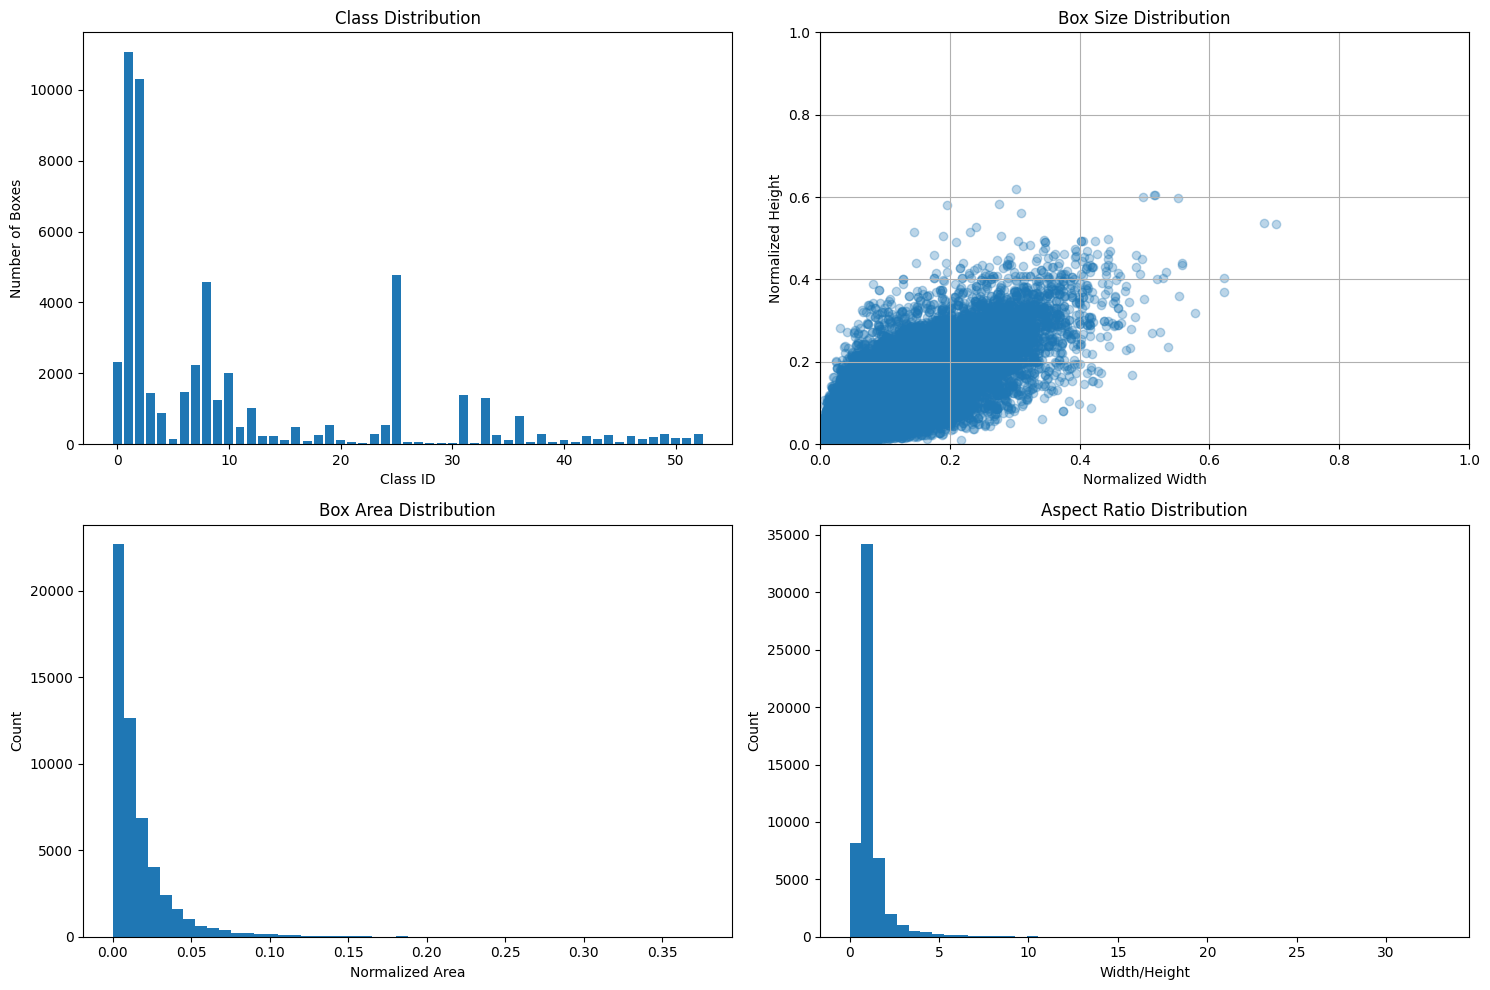

In [21]:

# 使用示例

label_train_path = "./train/labels"  # 替换为你的标签目录路径

# 分析标签
stats = analyze_yolo_labels(label_train_path)

# 打印统计结果
print("===== 类别分布 =====")
for class_id, count in stats['class_distribution'].items():
    print(f"类别 {class_id}: {count} 个边界框")


print(f"总类别数: {len(stats['class_distribution'])}")

print("\n===== 边界框统计 =====")
print(f"总边界框数量: {stats['num_boxes']}")
print(f"平均宽度: {stats['box_stats']['width']['mean']:.4f} ± {stats['box_stats']['width']['std']:.4f}")
print(f"平均高度: {stats['box_stats']['height']['mean']:.4f} ± {stats['box_stats']['height']['std']:.4f}")
print(f"平均面积: {stats['box_stats']['area']['mean']:.4f} ± {stats['box_stats']['area']['std']:.4f}")
print(f"平均宽高比: {stats['box_stats']['aspect_ratio']['mean']:.4f} ± {stats['box_stats']['aspect_ratio']['std']:.4f}")

# 可视化结果
plot_label_stats(stats)

===== 类别分布 =====
类别 0: 570 个边界框
类别 1: 2825 个边界框
类别 2: 2920 个边界框
类别 3: 377 个边界框
类别 4: 202 个边界框
类别 5: 32 个边界框
类别 6: 376 个边界框
类别 7: 610 个边界框
类别 8: 1232 个边界框
类别 9: 406 个边界框
类别 10: 579 个边界框
类别 11: 58 个边界框
类别 12: 213 个边界框
类别 13: 55 个边界框
类别 14: 39 个边界框
类别 15: 21 个边界框
类别 16: 152 个边界框
类别 17: 22 个边界框
类别 18: 94 个边界框
类别 19: 137 个边界框
类别 20: 50 个边界框
类别 21: 22 个边界框
类别 22: 21 个边界框
类别 23: 58 个边界框
类别 24: 65 个边界框
类别 25: 1187 个边界框
类别 26: 30 个边界框
类别 27: 24 个边界框
类别 28: 44 个边界框
类别 29: 3 个边界框
类别 30: 19 个边界框
类别 31: 467 个边界框
类别 32: 26 个边界框
类别 33: 304 个边界框
类别 34: 21 个边界框
类别 35: 37 个边界框
类别 37: 21 个边界框
类别 38: 98 个边界框
类别 39: 6 个边界框
类别 40: 43 个边界框
类别 41: 18 个边界框
类别 42: 102 个边界框
类别 43: 40 个边界框
类别 44: 32 个边界框
类别 45: 10 个边界框
类别 46: 89 个边界框
类别 47: 40 个边界框
类别 48: 75 个边界框
类别 49: 34 个边界框
类别 50: 77 个边界框
类别 51: 45 个边界框
类别 52: 295 个边界框
总类别数: 52

===== 边界框统计 =====
总边界框数量: 14323
平均宽度: 0.1121 ± 0.0705
平均高度: 0.1124 ± 0.0710
平均面积: 0.0165 ± 0.0205
平均宽高比: 1.1960 ± 1.1202


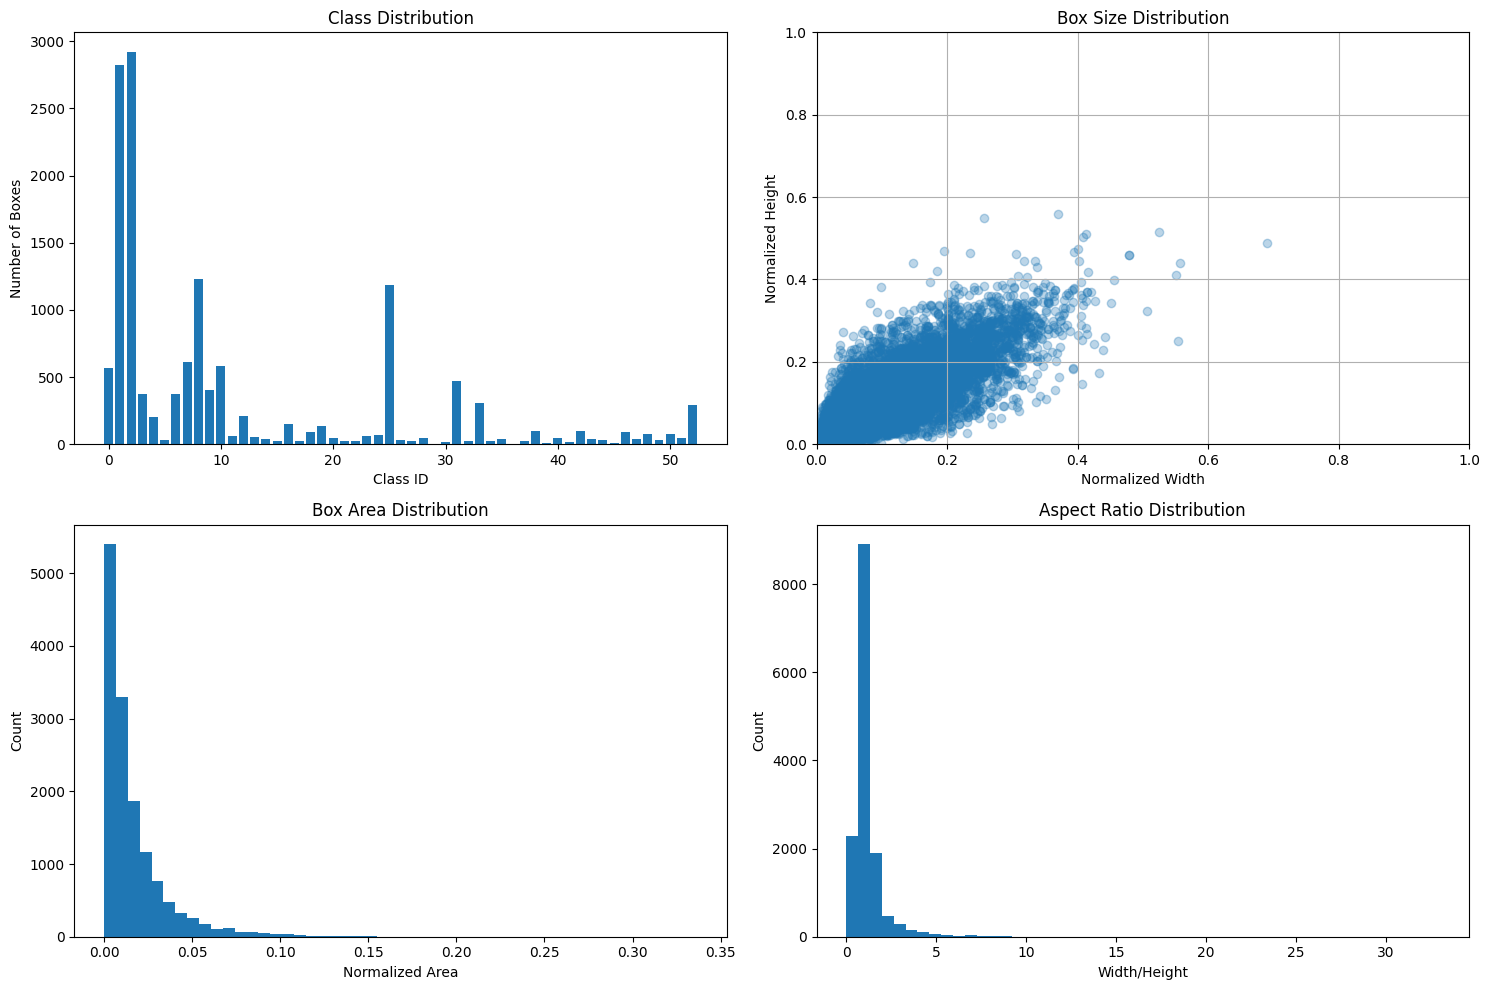

In [22]:

# 使用示例

label_val_path = "./val/labels"  # 替换为你的标签目录路径

# 分析标签
stats = analyze_yolo_labels(label_val_path)

# 打印统计结果
print("===== 类别分布 =====")
for class_id, count in stats['class_distribution'].items():
    print(f"类别 {class_id}: {count} 个边界框")
    # 一共有多少个类别
print(f"总类别数: {len(stats['class_distribution'])}")

# 打印每个类别的边界框数量
    # print(f"类别 {class_id}: {count} 个边界框")

print("\n===== 边界框统计 =====")
print(f"总边界框数量: {stats['num_boxes']}")
print(f"平均宽度: {stats['box_stats']['width']['mean']:.4f} ± {stats['box_stats']['width']['std']:.4f}")
print(f"平均高度: {stats['box_stats']['height']['mean']:.4f} ± {stats['box_stats']['height']['std']:.4f}")
print(f"平均面积: {stats['box_stats']['area']['mean']:.4f} ± {stats['box_stats']['area']['std']:.4f}")
print(f"平均宽高比: {stats['box_stats']['aspect_ratio']['mean']:.4f} ± {stats['box_stats']['aspect_ratio']['std']:.4f}")

# 可视化结果
plot_label_stats(stats)

训练集类别分布:
  类别 0: 2310 个样本
  类别 1: 11069 个样本
  类别 2: 10299 个样本
  类别 3: 1447 个样本
  类别 4: 868 个样本
  类别 5: 139 个样本
  类别 6: 1465 个样本
  类别 7: 2249 个样本
  类别 8: 4588 个样本
  类别 9: 1242 个样本
  类别 10: 2014 个样本
  类别 11: 476 个样本
  类别 12: 1015 个样本
  类别 13: 218 个样本
  类别 14: 236 个样本
  类别 15: 129 个样本
  类别 16: 493 个样本
  类别 17: 99 个样本
  类别 18: 247 个样本
  类别 19: 541 个样本
  类别 20: 122 个样本
  类别 21: 70 个样本
  类别 22: 44 个样本
  类别 23: 281 个样本
  类别 24: 553 个样本
  类别 25: 4765 个样本
  类别 26: 54 个样本
  类别 27: 66 个样本
  类别 28: 34 个样本
  类别 29: 36 个样本
  类别 30: 47 个样本
  类别 31: 1379 个样本
  类别 32: 32 个样本
  类别 33: 1295 个样本
  类别 34: 257 个样本
  类别 35: 130 个样本
  类别 36: 785 个样本
  类别 37: 70 个样本
  类别 38: 297 个样本
  类别 39: 51 个样本
  类别 40: 108 个样本
  类别 41: 74 个样本
  类别 42: 244 个样本
  类别 43: 150 个样本
  类别 44: 249 个样本
  类别 45: 63 个样本
  类别 46: 225 个样本
  类别 47: 142 个样本
  类别 48: 207 个样本
  类别 49: 298 个样本
  类别 50: 170 个样本
  类别 51: 188 个样本
  类别 52: 280 个样本

验证集类别分布:
  类别 0: 570 个样本
  类别 1: 2825 个样本
  类别 2: 2920 个样本
  类别 3: 377 个样本
  类别 4: 202 个样本
  类别 5

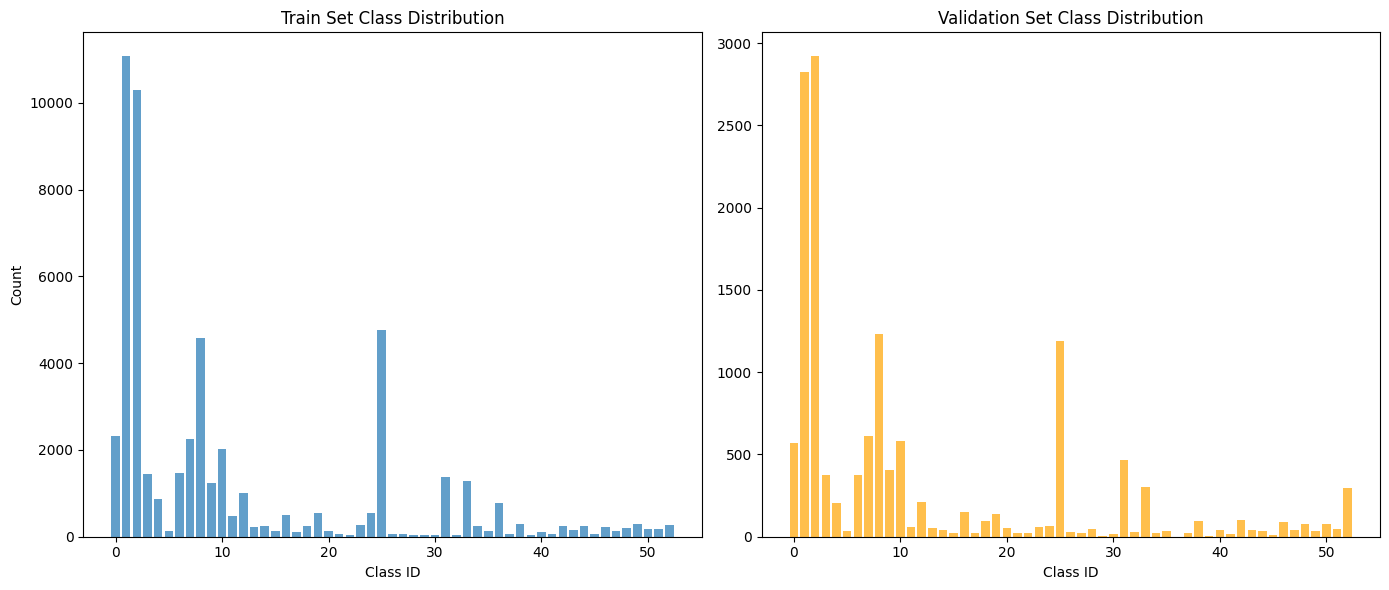


各类别样本比例(训练集/验证集):
  类别 0: 2310 / 570 ≈ 4.1:1
  类别 1: 11069 / 2825 ≈ 3.9:1
  类别 2: 10299 / 2920 ≈ 3.5:1
  类别 3: 1447 / 377 ≈ 3.8:1
  类别 4: 868 / 202 ≈ 4.3:1
  类别 5: 139 / 32 ≈ 4.3:1
  类别 6: 1465 / 376 ≈ 3.9:1
  类别 7: 2249 / 610 ≈ 3.7:1
  类别 8: 4588 / 1232 ≈ 3.7:1
  类别 9: 1242 / 406 ≈ 3.1:1
  类别 10: 2014 / 579 ≈ 3.5:1
  类别 11: 476 / 58 ≈ 8.2:1
  类别 12: 1015 / 213 ≈ 4.8:1
  类别 13: 218 / 55 ≈ 4.0:1
  类别 14: 236 / 39 ≈ 6.1:1
  类别 15: 129 / 21 ≈ 6.1:1
  类别 16: 493 / 152 ≈ 3.2:1
  类别 17: 99 / 22 ≈ 4.5:1
  类别 18: 247 / 94 ≈ 2.6:1
  类别 19: 541 / 137 ≈ 3.9:1
  类别 20: 122 / 50 ≈ 2.4:1
  类别 21: 70 / 22 ≈ 3.2:1
  类别 22: 44 / 21 ≈ 2.1:1
  类别 23: 281 / 58 ≈ 4.8:1
  类别 24: 553 / 65 ≈ 8.5:1
  类别 25: 4765 / 1187 ≈ 4.0:1
  类别 26: 54 / 30 ≈ 1.8:1
  类别 27: 66 / 24 ≈ 2.8:1
  类别 28: 34 / 44 ≈ 0.8:1
  类别 29: 36 / 3 ≈ 12.0:1
  类别 30: 47 / 19 ≈ 2.5:1
  类别 31: 1379 / 467 ≈ 3.0:1
  类别 32: 32 / 26 ≈ 1.2:1
  类别 33: 1295 / 304 ≈ 4.3:1
  类别 34: 257 / 21 ≈ 12.2:1
  类别 35: 130 / 37 ≈ 3.5:1
  类别 36: 785 / 0 ≈ ∞ (验证集无样本

In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

def count_classes(label_dir):
    """统计YOLO标签文件夹中的类别分布"""
    class_counts = defaultdict(int)
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
        with open(os.path.join(label_dir, filename), 'r') as f:
            for line in f:
                if line.strip():  # 跳过空行
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1
    return dict(sorted(class_counts.items()))

# 路径设置
train_label_dir = 'train/labels'
val_label_dir = 'val/labels'

# 统计类别
train_counts = count_classes(train_label_dir)
val_counts = count_classes(val_label_dir)

# 获取所有可能的类别ID
all_classes = set(train_counts.keys()).union(set(val_counts.keys()))

# 打印完整统计结果
print("训练集类别分布:")
for cls, count in sorted(train_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

print("\n验证集类别分布:")
for cls, count in sorted(val_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

# 检查类别差异
train_only = set(train_counts.keys()) - set(val_counts.keys())
val_only = set(val_counts.keys()) - set(train_counts.keys())

print("\n类别分布差异:")
if train_only:
    print(f"  ⚠️ 仅在训练集中出现的类别: {sorted(train_only)}")
else:
    print("  ✅ 没有仅在训练集中出现的类别")

if val_only:
    print(f"  ⚠️ 仅在验证集中出现的类别: {sorted(val_only)}")
else:
    print("  ✅ 没有仅在验证集中出现的类别")

# 检查是否所有类别在两个集合中都存在
if not train_only and not val_only:
    print("\n✅ 训练集和验证集包含完全相同的类别")
else:
    print("\n❌ 警告: 训练集和验证集类别不完全一致")

# 可视化比较
plt.figure(figsize=(14, 6))

# 训练集分布
plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label='Train')
plt.title('Train Set Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')

# 验证集分布
plt.subplot(1, 2, 2)
plt.bar(val_counts.keys(), val_counts.values(), alpha=0.7, color='orange', label='Val')
plt.title('Validation Set Class Distribution')
plt.xlabel('Class ID')

plt.tight_layout()
plt.show()

# 打印类别比例差异
print("\n各类别样本比例(训练集/验证集):")
for cls in sorted(all_classes):
    train_num = train_counts.get(cls, 0)
    val_num = val_counts.get(cls, 0)
    ratio = f"{train_num/val_num:.1f}:1" if val_num != 0 else "∞ (验证集无样本)"
    print(f"  类别 {cls}: {train_num} / {val_num} ≈ {ratio}")

### 将类别36的所有标注行注释掉（添加#前缀）

In [30]:
def comment_class_in_labels(label_dir, class_id):
    """用 '# ' 规范注释指定类别的标签行"""
    modified_files = 0
    modified_lines = 0
    
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
            
        filepath = os.path.join(label_dir, filename)
        modified = False
        
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        new_lines = []
        for line in lines:
            if line.strip():  # 跳过空行
                parts = line.split()
                if int(parts[0]) == class_id:
                    new_lines.append('# ' + line)  # 井号后添加空格
                    modified = True
                    modified_lines += 1
                else:
                    new_lines.append(line)
        
        if modified:
            with open(filepath, 'w') as f:
                f.writelines(new_lines)
            modified_files += 1
    
    print(f"处理完成！共修改 {modified_files} 个文件，注释了 {modified_lines} 行类别 {class_id} 的标签。")

# 使用示例
comment_class_in_labels("train/labels", 36)  # 注释类别36

处理完成！共修改 14 个文件，注释了 785 行类别 36 的标签。


### 重新验证

训练集类别分布:
  类别 0: 2310 个样本
  类别 1: 11069 个样本
  类别 2: 10299 个样本
  类别 3: 1447 个样本
  类别 4: 868 个样本
  类别 5: 139 个样本
  类别 6: 1465 个样本
  类别 7: 2249 个样本
  类别 8: 4588 个样本
  类别 9: 1242 个样本
  类别 10: 2014 个样本
  类别 11: 476 个样本
  类别 12: 1015 个样本
  类别 13: 218 个样本
  类别 14: 236 个样本
  类别 15: 129 个样本
  类别 16: 493 个样本
  类别 17: 99 个样本
  类别 18: 247 个样本
  类别 19: 541 个样本
  类别 20: 122 个样本
  类别 21: 70 个样本
  类别 22: 44 个样本
  类别 23: 281 个样本
  类别 24: 553 个样本
  类别 25: 4765 个样本
  类别 26: 54 个样本
  类别 27: 66 个样本
  类别 28: 34 个样本
  类别 29: 36 个样本
  类别 30: 47 个样本
  类别 31: 1379 个样本
  类别 32: 32 个样本
  类别 33: 1295 个样本
  类别 34: 257 个样本
  类别 35: 130 个样本
  类别 36: 785 个样本
  类别 37: 70 个样本
  类别 38: 297 个样本
  类别 39: 51 个样本
  类别 40: 108 个样本
  类别 41: 74 个样本
  类别 42: 244 个样本
  类别 43: 150 个样本
  类别 44: 249 个样本
  类别 45: 63 个样本
  类别 46: 225 个样本
  类别 47: 142 个样本
  类别 48: 207 个样本
  类别 49: 298 个样本
  类别 50: 170 个样本
  类别 51: 188 个样本
  类别 52: 280 个样本

验证集类别分布:
  类别 0: 570 个样本
  类别 1: 2825 个样本
  类别 2: 2920 个样本
  类别 3: 377 个样本
  类别 4: 202 个样本
  类别 5

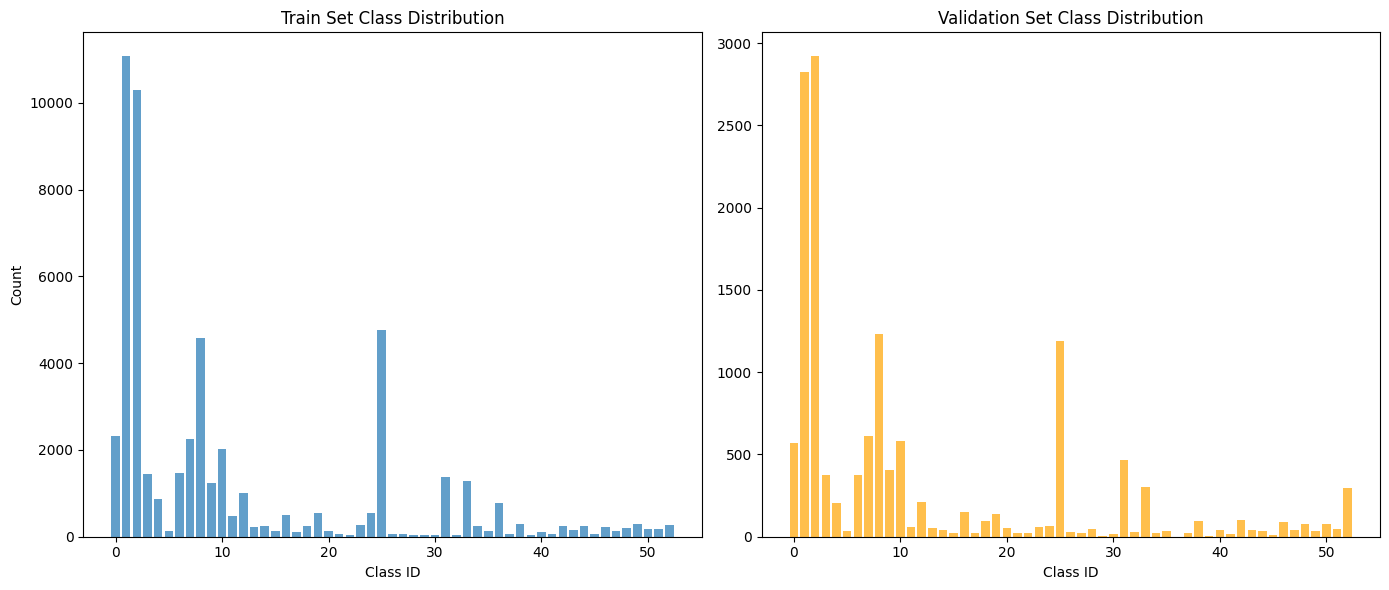


各类别样本比例(训练集/验证集):
  类别 0: 2310 / 570 ≈ 4.1:1
  类别 1: 11069 / 2825 ≈ 3.9:1
  类别 2: 10299 / 2920 ≈ 3.5:1
  类别 3: 1447 / 377 ≈ 3.8:1
  类别 4: 868 / 202 ≈ 4.3:1
  类别 5: 139 / 32 ≈ 4.3:1
  类别 6: 1465 / 376 ≈ 3.9:1
  类别 7: 2249 / 610 ≈ 3.7:1
  类别 8: 4588 / 1232 ≈ 3.7:1
  类别 9: 1242 / 406 ≈ 3.1:1
  类别 10: 2014 / 579 ≈ 3.5:1
  类别 11: 476 / 58 ≈ 8.2:1
  类别 12: 1015 / 213 ≈ 4.8:1
  类别 13: 218 / 55 ≈ 4.0:1
  类别 14: 236 / 39 ≈ 6.1:1
  类别 15: 129 / 21 ≈ 6.1:1
  类别 16: 493 / 152 ≈ 3.2:1
  类别 17: 99 / 22 ≈ 4.5:1
  类别 18: 247 / 94 ≈ 2.6:1
  类别 19: 541 / 137 ≈ 3.9:1
  类别 20: 122 / 50 ≈ 2.4:1
  类别 21: 70 / 22 ≈ 3.2:1
  类别 22: 44 / 21 ≈ 2.1:1
  类别 23: 281 / 58 ≈ 4.8:1
  类别 24: 553 / 65 ≈ 8.5:1
  类别 25: 4765 / 1187 ≈ 4.0:1
  类别 26: 54 / 30 ≈ 1.8:1
  类别 27: 66 / 24 ≈ 2.8:1
  类别 28: 34 / 44 ≈ 0.8:1
  类别 29: 36 / 3 ≈ 12.0:1
  类别 30: 47 / 19 ≈ 2.5:1
  类别 31: 1379 / 467 ≈ 3.0:1
  类别 32: 32 / 26 ≈ 1.2:1
  类别 33: 1295 / 304 ≈ 4.3:1
  类别 34: 257 / 21 ≈ 12.2:1
  类别 35: 130 / 37 ≈ 3.5:1
  类别 36: 785 / 0 ≈ ∞ (验证集无样本

In [34]:

# 路径设置
train_label_dir = 'train/labels'
val_label_dir = 'val/labels'

# 统计类别
train_counts = count_classes(train_label_dir)
val_counts = count_classes(val_label_dir)

# 获取所有可能的类别ID
all_classes = set(train_counts.keys()).union(set(val_counts.keys()))

# 打印完整统计结果
print("训练集类别分布:")
for cls, count in sorted(train_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

print("\n验证集类别分布:")
for cls, count in sorted(val_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

# 检查类别差异
train_only = set(train_counts.keys()) - set(val_counts.keys())
val_only = set(val_counts.keys()) - set(train_counts.keys())

print("\n类别分布差异:")
if train_only:
    print(f"  ⚠️ 仅在训练集中出现的类别: {sorted(train_only)}")
else:
    print("  ✅ 没有仅在训练集中出现的类别")

if val_only:
    print(f"  ⚠️ 仅在验证集中出现的类别: {sorted(val_only)}")
else:
    print("  ✅ 没有仅在验证集中出现的类别")

# 检查是否所有类别在两个集合中都存在
if not train_only and not val_only:
    print("\n✅ 训练集和验证集包含完全相同的类别")
else:
    print("\n❌ 警告: 训练集和验证集类别不完全一致")

# 可视化比较
plt.figure(figsize=(14, 6))

# 训练集分布
plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label='Train')
plt.title('Train Set Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')

# 验证集分布
plt.subplot(1, 2, 2)
plt.bar(val_counts.keys(), val_counts.values(), alpha=0.7, color='orange', label='Val')
plt.title('Validation Set Class Distribution')
plt.xlabel('Class ID')

plt.tight_layout()
plt.show()

# 打印类别比例差异
print("\n各类别样本比例(训练集/验证集):")
for cls in sorted(all_classes):
    train_num = train_counts.get(cls, 0)
    val_num = val_counts.get(cls, 0)
    ratio = f"{train_num/val_num:.1f}:1" if val_num != 0 else "∞ (验证集无样本)"
    print(f"  类别 {cls}: {train_num} / {val_num} ≈ {ratio}")

In [33]:
import os
from collections import defaultdict

def restore_commented_labels(label_dir):
    """恢复被#注释的标签行（删除行首的#）"""
    restored_files = 0
    restored_lines = 0
    
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
            
        filepath = os.path.join(label_dir, filename)
        modified = False
        
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        new_lines = []
        for line in lines:
            if line.strip().startswith('#'):  # 处理注释行
                new_lines.append(line.lstrip('#'))  # 移除行首#
                modified = True
                restored_lines += 1
            else:
                new_lines.append(line)
        
        if modified:
            with open(filepath, 'w') as f:
                f.writelines(new_lines)
            restored_files += 1
    
    print(f"恢复完成！共修改 {restored_files} 个文件，恢复了 {restored_lines} 行被注释的标签。")

# 使用示例
train_label_dir = 'train/labels'  # 替换为你的训练集标签路径
restore_commented_labels(train_label_dir)

恢复完成！共修改 14 个文件，恢复了 785 行被注释的标签。


## 以上注释的方法无效

### 删除多的类别

结果：
  ✅ 没有仅在训练集中出现的类别
  ✅ 没有仅在验证集中出现的类别

✅ 训练集和验证集包含完全相同的类别

In [35]:
import os

def delete_specific_class(label_dir, class_id):
    """
    删除标签文件中指定类别的所有行
    :param label_dir: 标签文件夹路径
    :param class_id: 要删除的类别ID (如36)
    """
    deleted_files = 0
    deleted_lines = 0

    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
            
        filepath = os.path.join(label_dir, filename)
        modified = False
        
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # 过滤掉目标类别的行
        new_lines = []
        for line in lines:
            if line.strip():  # 跳过空行
                parts = line.split()
                if int(parts[0]) == class_id:
                    modified = True
                    deleted_lines += 1
                    continue  # 跳过该行
                new_lines.append(line)
        
        # 只有实际修改过的文件才重写
        if modified:
            with open(filepath, 'w') as f:
                f.writelines(new_lines)
            deleted_files += 1
    
    print(f"删除完成！共修改 {deleted_files} 个文件，删除了 {deleted_lines} 行类别 {class_id} 的标签。")

# 使用示例
delete_specific_class("train/labels", 36)  # 删除类别36的所有行

删除完成！共修改 14 个文件，删除了 785 行类别 36 的标签。


训练集类别分布:
  类别 0: 2310 个样本
  类别 1: 11069 个样本
  类别 2: 10299 个样本
  类别 3: 1447 个样本
  类别 4: 868 个样本
  类别 5: 139 个样本
  类别 6: 1465 个样本
  类别 7: 2249 个样本
  类别 8: 4588 个样本
  类别 9: 1242 个样本
  类别 10: 2014 个样本
  类别 11: 476 个样本
  类别 12: 1015 个样本
  类别 13: 218 个样本
  类别 14: 236 个样本
  类别 15: 129 个样本
  类别 16: 493 个样本
  类别 17: 99 个样本
  类别 18: 247 个样本
  类别 19: 541 个样本
  类别 20: 122 个样本
  类别 21: 70 个样本
  类别 22: 44 个样本
  类别 23: 281 个样本
  类别 24: 553 个样本
  类别 25: 4765 个样本
  类别 26: 54 个样本
  类别 27: 66 个样本
  类别 28: 34 个样本
  类别 29: 36 个样本
  类别 30: 47 个样本
  类别 31: 1379 个样本
  类别 32: 32 个样本
  类别 33: 1295 个样本
  类别 34: 257 个样本
  类别 35: 130 个样本
  类别 37: 70 个样本
  类别 38: 297 个样本
  类别 39: 51 个样本
  类别 40: 108 个样本
  类别 41: 74 个样本
  类别 42: 244 个样本
  类别 43: 150 个样本
  类别 44: 249 个样本
  类别 45: 63 个样本
  类别 46: 225 个样本
  类别 47: 142 个样本
  类别 48: 207 个样本
  类别 49: 298 个样本
  类别 50: 170 个样本
  类别 51: 188 个样本
  类别 52: 280 个样本

验证集类别分布:
  类别 0: 570 个样本
  类别 1: 2825 个样本
  类别 2: 2920 个样本
  类别 3: 377 个样本
  类别 4: 202 个样本
  类别 5: 32 个样本
  类别 6: 

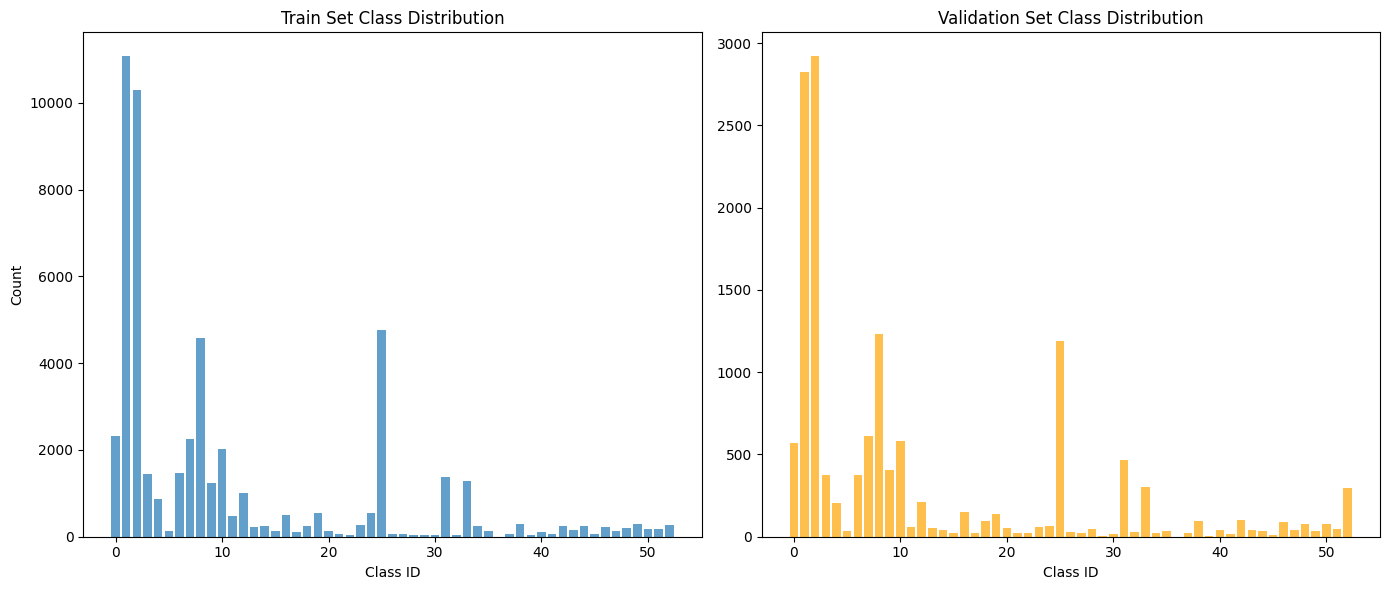


各类别样本比例(训练集/验证集):
  类别 0: 2310 / 570 ≈ 4.1:1
  类别 1: 11069 / 2825 ≈ 3.9:1
  类别 2: 10299 / 2920 ≈ 3.5:1
  类别 3: 1447 / 377 ≈ 3.8:1
  类别 4: 868 / 202 ≈ 4.3:1
  类别 5: 139 / 32 ≈ 4.3:1
  类别 6: 1465 / 376 ≈ 3.9:1
  类别 7: 2249 / 610 ≈ 3.7:1
  类别 8: 4588 / 1232 ≈ 3.7:1
  类别 9: 1242 / 406 ≈ 3.1:1
  类别 10: 2014 / 579 ≈ 3.5:1
  类别 11: 476 / 58 ≈ 8.2:1
  类别 12: 1015 / 213 ≈ 4.8:1
  类别 13: 218 / 55 ≈ 4.0:1
  类别 14: 236 / 39 ≈ 6.1:1
  类别 15: 129 / 21 ≈ 6.1:1
  类别 16: 493 / 152 ≈ 3.2:1
  类别 17: 99 / 22 ≈ 4.5:1
  类别 18: 247 / 94 ≈ 2.6:1
  类别 19: 541 / 137 ≈ 3.9:1
  类别 20: 122 / 50 ≈ 2.4:1
  类别 21: 70 / 22 ≈ 3.2:1
  类别 22: 44 / 21 ≈ 2.1:1
  类别 23: 281 / 58 ≈ 4.8:1
  类别 24: 553 / 65 ≈ 8.5:1
  类别 25: 4765 / 1187 ≈ 4.0:1
  类别 26: 54 / 30 ≈ 1.8:1
  类别 27: 66 / 24 ≈ 2.8:1
  类别 28: 34 / 44 ≈ 0.8:1
  类别 29: 36 / 3 ≈ 12.0:1
  类别 30: 47 / 19 ≈ 2.5:1
  类别 31: 1379 / 467 ≈ 3.0:1
  类别 32: 32 / 26 ≈ 1.2:1
  类别 33: 1295 / 304 ≈ 4.3:1
  类别 34: 257 / 21 ≈ 12.2:1
  类别 35: 130 / 37 ≈ 3.5:1
  类别 37: 70 / 21 ≈ 3.3:1
  类

In [36]:

# 路径设置
train_label_dir = 'train/labels'
val_label_dir = 'val/labels'

# 统计类别
train_counts = count_classes(train_label_dir)
val_counts = count_classes(val_label_dir)

# 获取所有可能的类别ID
all_classes = set(train_counts.keys()).union(set(val_counts.keys()))

# 打印完整统计结果
print("训练集类别分布:")
for cls, count in sorted(train_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

print("\n验证集类别分布:")
for cls, count in sorted(val_counts.items()):
    print(f"  类别 {cls}: {count} 个样本")

# 检查类别差异
train_only = set(train_counts.keys()) - set(val_counts.keys())
val_only = set(val_counts.keys()) - set(train_counts.keys())

print("\n类别分布差异:")
if train_only:
    print(f"  ⚠️ 仅在训练集中出现的类别: {sorted(train_only)}")
else:
    print("  ✅ 没有仅在训练集中出现的类别")

if val_only:
    print(f"  ⚠️ 仅在验证集中出现的类别: {sorted(val_only)}")
else:
    print("  ✅ 没有仅在验证集中出现的类别")

# 检查是否所有类别在两个集合中都存在
if not train_only and not val_only:
    print("\n✅ 训练集和验证集包含完全相同的类别")
else:
    print("\n❌ 警告: 训练集和验证集类别不完全一致")

# 可视化比较
plt.figure(figsize=(14, 6))

# 训练集分布
plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label='Train')
plt.title('Train Set Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')

# 验证集分布
plt.subplot(1, 2, 2)
plt.bar(val_counts.keys(), val_counts.values(), alpha=0.7, color='orange', label='Val')
plt.title('Validation Set Class Distribution')
plt.xlabel('Class ID')

plt.tight_layout()
plt.show()

# 打印类别比例差异
print("\n各类别样本比例(训练集/验证集):")
for cls in sorted(all_classes):
    train_num = train_counts.get(cls, 0)
    val_num = val_counts.get(cls, 0)
    ratio = f"{train_num/val_num:.1f}:1" if val_num != 0 else "∞ (验证集无样本)"
    print(f"  类别 {cls}: {train_num} / {val_num} ≈ {ratio}")